In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
import calendar
import seaborn as sns

In [2]:
df=pd.read_csv("ressources/engie/PV.csv", sep=";",decimal=",")

In [3]:
df.head()

,DATE,INV,Prod,Pred_self,Pred_neighbour,IRRADIANCE
0,2018-06-07 16:50:00,PVT01.INV01,695.58,690.317974,693.949980,919.0
1,2018-06-08 07:00:00,PVT01.INV01,25.42,44.702792,25.197383,35.7
2,2018-06-08 07:10:00,PVT01.INV01,22.74,49.015177,22.440701,41.6
3,2018-06-08 07:20:00,PVT01.INV01,28.04,68.165090,28.381391,67.8
4,2018-06-08 07:30:00,PVT01.INV01,39.20,85.633903,40.430942,91.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69120 entries, 0 to 69119
Data columns (total 6 columns):
DATE              69120 non-null object
INV               69120 non-null object
Prod              69120 non-null float64
Pred_self         69120 non-null float64
Pred_neighbour    69120 non-null float64
IRRADIANCE        69120 non-null float64
dtypes: float64(4), object(2)
memory usage: 3.2+ MB


In [3]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69120 entries, 0 to 69119
Data columns (total 6 columns):
DATE              69120 non-null datetime64[ns]
INV               69120 non-null object
Prod              69120 non-null float64
Pred_self         69120 non-null float64
Pred_neighbour    69120 non-null float64
IRRADIANCE        69120 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.2+ MB


In [4]:
df = df.set_index("DATE")
df.head()

,INV,Prod,Pred_self,Pred_neighbour,IRRADIANCE
DATE,,,,,
2018-06-07 16:50:00,PVT01.INV01,695.58,690.317974,693.949980,919.0
2018-06-08 07:00:00,PVT01.INV01,25.42,44.702792,25.197383,35.7
2018-06-08 07:10:00,PVT01.INV01,22.74,49.015177,22.440701,41.6
2018-06-08 07:20:00,PVT01.INV01,28.04,68.165090,28.381391,67.8
2018-06-08 07:30:00,PVT01.INV01,39.20,85.633903,40.430942,91.7


In [39]:
df.tail()

,INV,Prod,Pred_self,Pred_neighbour,IRRADIANCE
DATE,,,,,
2018-11-11 16:10:00,PVT04.INV02,41.76,64.119070,38.356931,58.9
2018-11-11 16:20:00,PVT04.INV02,48.09,66.830975,45.755051,62.6
2018-11-11 16:30:00,PVT04.INV02,43.54,61.993524,41.337550,56.0
2018-11-11 16:40:00,PVT04.INV02,23.64,46.088573,21.587403,34.3
2018-11-11 16:50:00,PVT04.INV02,23.83,51.439086,21.705618,41.6


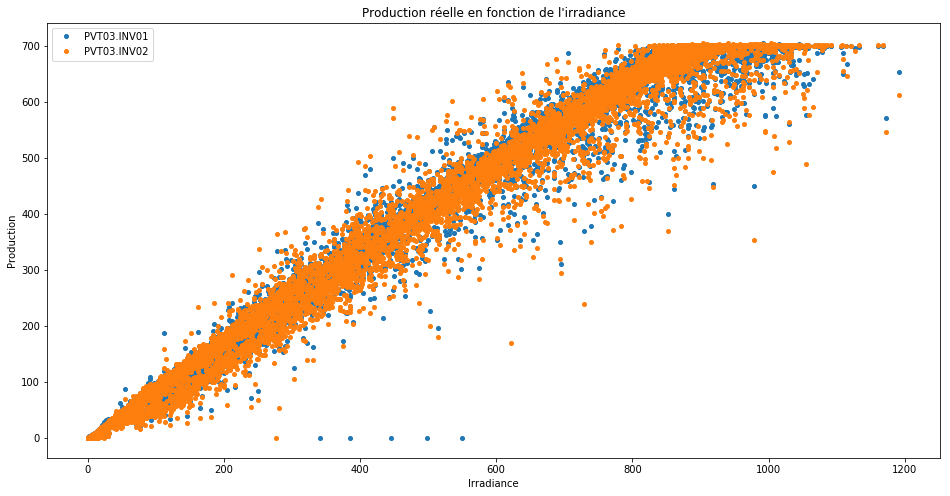

In [6]:
groups = df.groupby('INV')
plt.figure(figsize=(16,8))
for name, group in groups:
    if name in ["PVT03.INV01", "PVT03.INV02"]:
        plt.plot(group["IRRADIANCE"], group["Prod"], marker='o', linestyle='', ms=4, label=name)
plt.title("Production réelle en fonction de l'irradiance")
plt.xlabel("Irradiance")
plt.ylabel("Production")
plt.legend()

#plt.scatter(df["IRRADIANCE"],df["Prod"], c=df.groupby("INV"), cmap=plt.cm.get_cmap('Blues'))


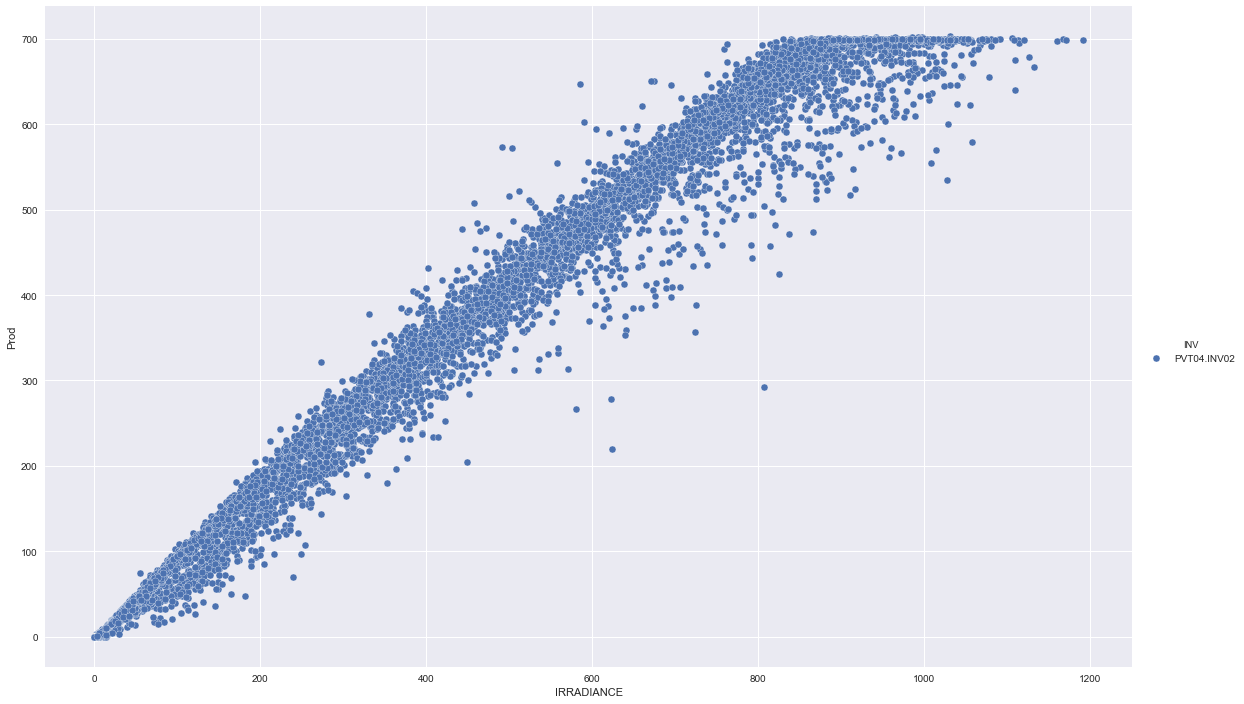

In [54]:
sns.pairplot(x_vars=["IRRADIANCE"], y_vars=["Prod"], data=df[df["INV"]=="PVT04.INV02"], hue="INV", size=10, aspect=16/10)

In [12]:
from jupyter_plotly_dash import JupyterDash
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = JupyterDash('Prod-Irradiance')

app.layout = html.Div([
    dcc.Graph(
        id='Prod-Irradiance',
        figure={
            'data': [
                go.Scatter(
                    x=df[df['INV'] == i]['IRRADIANCE'],
                    y=df[df['INV'] == i]['Prod'],
                    text=str(i),
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 4,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name=i
                ) for i in df["INV"].unique()
            ],
            'layout': go.Layout(
                xaxis={'type': 'linear', 'title': 'Irradiance'},
                yaxis={'title': 'Production'},
                #margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                #legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
    )
])

app

In [5]:
from jupyter_plotly_dash import JupyterDash
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

init_notebook_mode(connected=True)

list_inv = df["INV"].unique()

app = JupyterDash('Prod-Irradiance')

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='inv_number',
                options=[{'label': i, 'value': i} for i in list_inv],
                value='PVT01.INV01'
                        ),
                ],
                style={'width': '48%', 'display': 'inline-block'}
                ),
            ]),
        dcc.Graph(id='Graph-Prod-irradiance', ),

])

@app.callback(
    dash.dependencies.Output('Graph-Prod-irradiance', 'figure'),
    [dash.dependencies.Input('inv_number', 'value')])
def update_graph(inv_number):
    return {
        'data': [go.Scatter(
            #x=df[df['INV'] == inv_number]['IRRADIANCE'],
            #y=df[df['INV'] == inv_number]['Prod'],
            x=df[df["INV"]== inv_number]["2018-"+str(month)]["IRRADIANCE"],
            y=df[df["INV"]== inv_number]["2018-"+str(month)]['Prod'],
            text=inv_number,
            mode='markers',
            opacity=0.7,
            marker={
                   'size': 4,
                   'line': {'width': 0.5, 'color': 'white'}
                    },
                    name=calendar.month_name[month]
               ) for month in list(set(df.index.month))],
        'layout': go.Layout(
            xaxis={'type': 'linear', 'title': 'Irradiance'},
            yaxis={'title': 'Production'},
            width=750,
            height=500,
            margin={'l': 40, 'b': 40, 't': 40, 'r': 0},
            hovermode='closest'
        )
    }

app

In [84]:
idx = pd.IndexSlice
df.loc['2018-08',idx["INV", "Prod"]]
test=df[df["INV"]=="PVT01.INV01"]["2018-8"]["IRRADIANCE"]

#test["2018-08"]
#type(list(set(df.index.month))[0])
calendar.month_name[1]

'January'

In [6]:
df_work = df.copy()
df_work = df_work.pivot(columns="INV", values=["Prod","Pred_self","Pred_neighbour","IRRADIANCE"])
df_work = df_work.fillna(value=0)
df_work = df_work.swaplevel(axis=1)
df_work = df_work.sort_values(by="INV", axis=1)
df_work.head()

INV                 PVT01.INV01                                        \
                           Prod IRRADIANCE   Pred_self Pred_neighbour   
DATE                                                                    
2018-06-07 16:50:00      695.58      919.0  690.317974     693.949980   
2018-06-08 07:00:00       25.42       35.7   44.702792      25.197383   
2018-06-08 07:10:00       22.74       41.6   49.015177      22.440701   
2018-06-08 07:20:00       28.04       67.8   68.165090      28.381391   
2018-06-08 07:30:00       39.20       91.7   85.633903      40.430942   

INV                 PVT01.INV02                                        \
                           Prod IRRADIANCE Pred_neighbour   Pred_self   
DATE                                                                    
2018-06-07 16:50:00      700.76      919.0     699.117278  695.636722   
2018-06-08 07:00:00       26.06       35.7      25.676702   45.321540   
2018-06-08 07:10:00       22.50       41.6      23.666146   49.665318   
2018-06-08 07:20:00       27.16       67.8      30.289965   68.954640   
2018-06-08 07:30:00       37.90       91.7      42.864158   86.550624   

INV                 PVT02.INV01                   ...        PVT03.INV02  \
                           Prod Pred_neighbour    ...     Pred_neighbour   
DATE                                              ...                      
2018-06-07 16:50:00      699.75     703.557104    ...         693.344689   
2018-06-08 07:00:00       28.01      28.975557    ...          25.703295   
2018-06-08 07:10:00       27.66      27.303469    ...          24.474918   
2018-06-08 07:20:00       37.20      35.258871    ...          33.084980   
2018-06-08 07:30:00       52.75      49.044720    ...          48.519347   

INV                             PVT04.INV01                                    \
                      Pred_self   Pred_self IRRADIANCE    Prod Pred_neighbour   
DATE                                                                            
2018-06-07 16:50:00  690.285465  700.062286      919.0  698.44     702.896448   
2018-06-08 07:00:00   45.353103   48.517991       35.7   26.88      26.624994   
2018-06-08 07:10:00   49.660927   52.869979       41.6   24.30      27.513785   
2018-06-08 07:20:00   68.790586   72.195758       67.8   32.45      38.389392   
2018-06-08 07:30:00   86.240924   89.824999       91.7   45.85      54.922159   

INV                 PVT04.INV02                                    
                      Pred_self    Prod Pred_neighbour IRRADIANCE  
DATE                                                               
2018-06-07 16:50:00  694.526840  699.30     693.766625      919.0  
2018-06-08 07:00:00   47.114699   25.40      25.639479       35.7  
2018-06-08 07:10:00   51.439086   25.68      25.082466       41.6  
2018-06-08 07:20:00   70.642299   35.65      35.206111       67.8  
2018-06-08 07:30:00   88.159734   51.19      50.823989       91.7  

[5 rows x 32 columns]

In [59]:
df_work["PVT01.INV01"].describe()

,Prod,IRRADIANCE,Pred_self,Pred_neighbour
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,358.922119,479.605421,369.158899,361.556293
std,241.406586,329.645665,240.942200,241.978254
min,0.000000,0.000000,18.609209,-1.988853
25%,117.910000,161.175000,136.414062,120.644960
50%,369.075000,474.900000,365.719647,374.863725
75%,592.932500,782.625000,590.639755,599.238205
max,703.600000,1192.100000,889.930230,715.382537


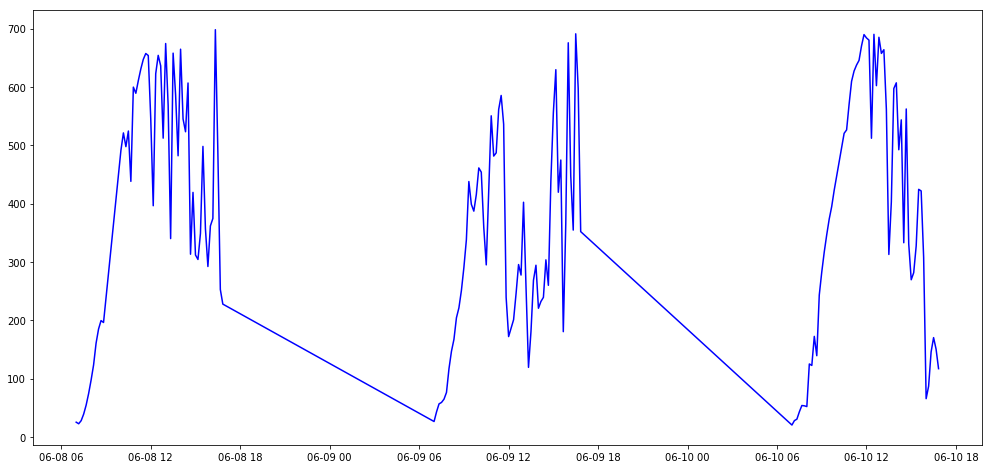

In [9]:
plt.figure(figsize=(17,8))
plt.plot(df_work["2018-06-08":"2018-06-10"]["PVT01.INV01","Prod"],"b")

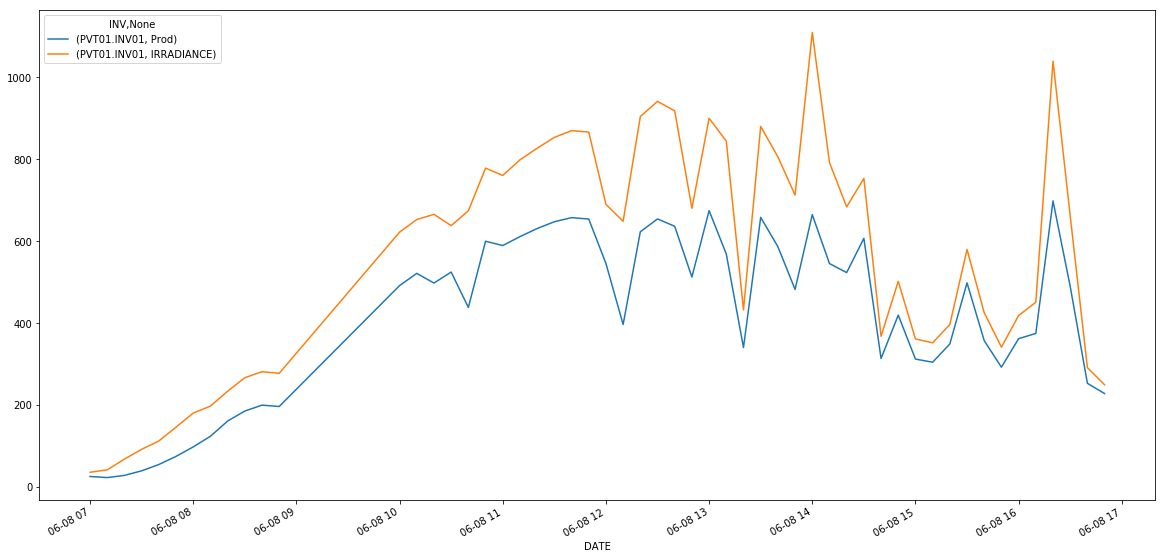

In [168]:
idx = pd.IndexSlice
df_work.loc['2018-06-08',idx['PVT01.INV01',['Prod','IRRADIANCE']]].plot(figsize=(20,10))

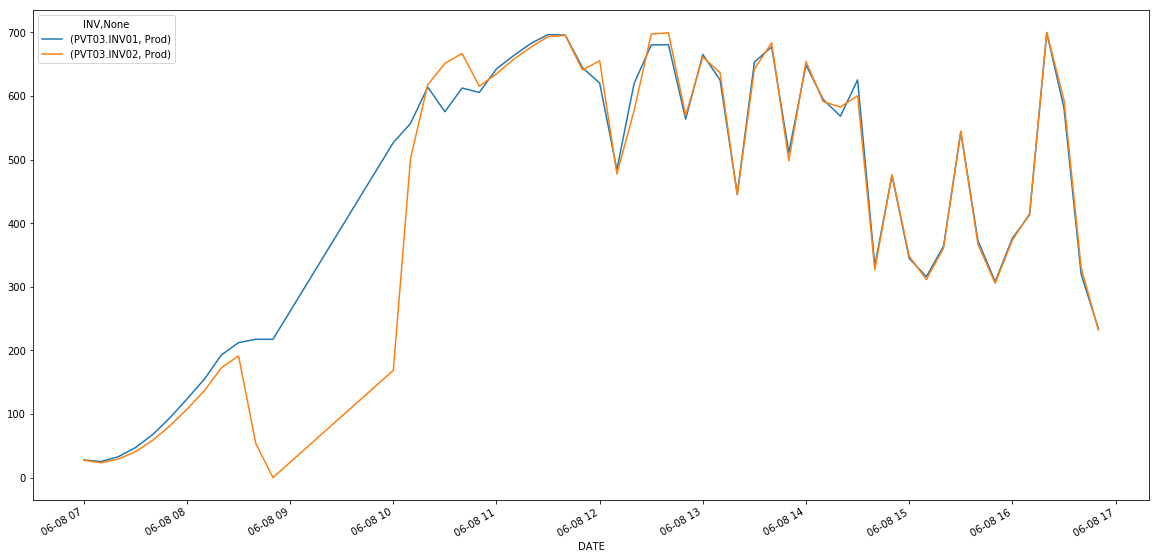

In [180]:
df_work.loc['2018-06-08',idx[['PVT03.INV01','PVT03.INV02'],'Prod']].plot(figsize=(20,10))